In [18]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.relpath("../src"))

import utility as ut

print("Setup complete.")

Setup complete.


In [19]:
path = os.path.abspath("./train-test")
train_filename = "data_yearly_hourly_train"
test_filename = "data_yearly_hourly_test"
ext = "csv"
LABEL = "calls"

raw_train_data = pd.read_csv(os.path.join(path, ".".join([train_filename, ext])), infer_datetime_format = True)
raw_test_data = pd.read_csv(os.path.join(path, ".".join([test_filename, ext])), infer_datetime_format = True)
print("Raw train and test data loaded.")

Raw train and test data loaded.


In [20]:
to_roll_columns = ["Latitude", "Longitude"]
cat_columns = ["day_of_year", "hour"]

roll_columns = ["_".join([name, "rel"]) for name in to_roll_columns]
raw_train_data[roll_columns] = raw_train_data[to_roll_columns].rolling(4, center = True).mean()
raw_test_data[roll_columns] = raw_test_data[to_roll_columns].rolling(4, center = True).mean()
print(f"Added rolling features for columns: {to_roll_columns}.")

cols_to_transform = list(raw_train_data.columns)
cols_to_transform = [x for x in cols_to_transform if x not in cat_columns]
cols_to_transform.remove(LABEL)

method = "mean"
train_data = ut.scale(raw_train_data, cols_to_transform, method)
test_data = ut.scale(raw_test_data, cols_to_transform, method)
print(f"Scaled columns {cols_to_transform} using method: {method}.")

train_data.dropna(inplace = True)
test_data.dropna(inplace = True)

# train_data["hour"] = train_data["hour"] / train_data["hour"].max()
# train_data["day_of_year"] = train_data["day_of_year"] / train_data["day_of_year"].max()
# test_data["hour"] = test_data["hour"] / test_data["hour"].max()
# test_data["day_of_year"] = test_data["day_of_year"] / test_data["day_of_year"].max()

Added rolling features for columns: ['Latitude', 'Longitude'].
Scaled columns ['Latitude', 'Longitude', 'Latitude_rel', 'Longitude_rel'] using method: mean.


In [21]:
train_data = pd.get_dummies(train_data, columns = cat_columns)
test_data = pd.get_dummies(test_data, columns = cat_columns)
test_data[list(set(train_data.columns).difference(set(test_data.columns)))] = 0
print(f"Converted columns {cat_columns} using one-hot-encoding.")

Converted columns ['day_of_year', 'hour'] using one-hot-encoding.


In [22]:
path_to_save = os.path.relpath("./train-test")
train_data.to_csv(os.path.join(path_to_save, ".".join(["train_data", "csv"])), index = False)
test_data.to_csv(os.path.join(path_to_save, ".".join(["test_data", "csv"])), index = False)
print(f"Saved training and test data to {path_to_save}.")

Save training and test data to train-test.


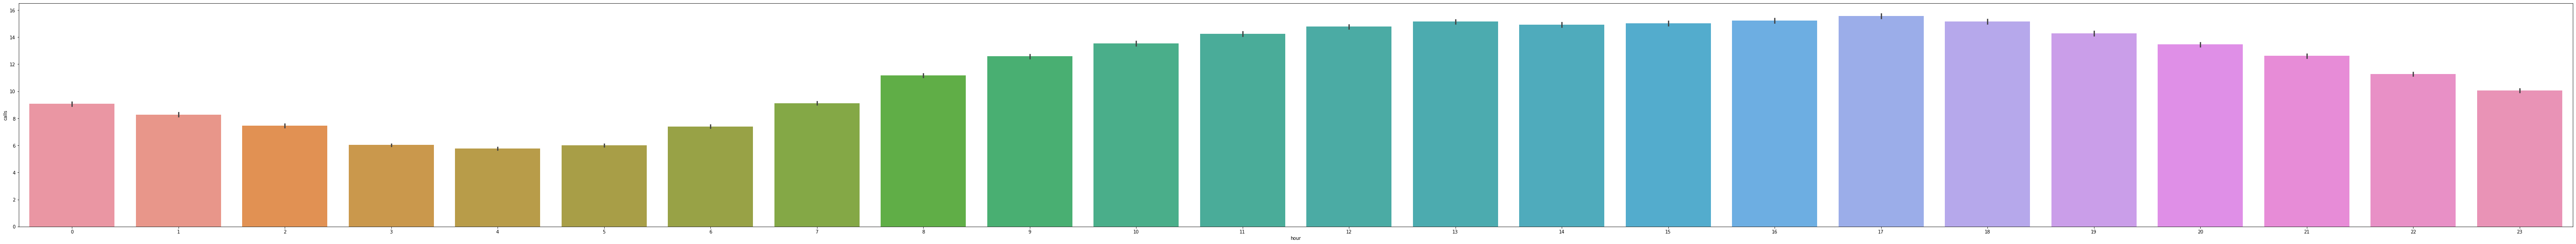

In [23]:
sns.barplot(data = raw_train_data, x = "hour", y = "calls")
path_to_save = os.path.relpath("../plots/vis")
plt.savefig(os.path.join(path_to_save, ".".join(["hourly_distribution", "png"])))
print(f"Hourly call distribution plot saved in {path_to_save}")

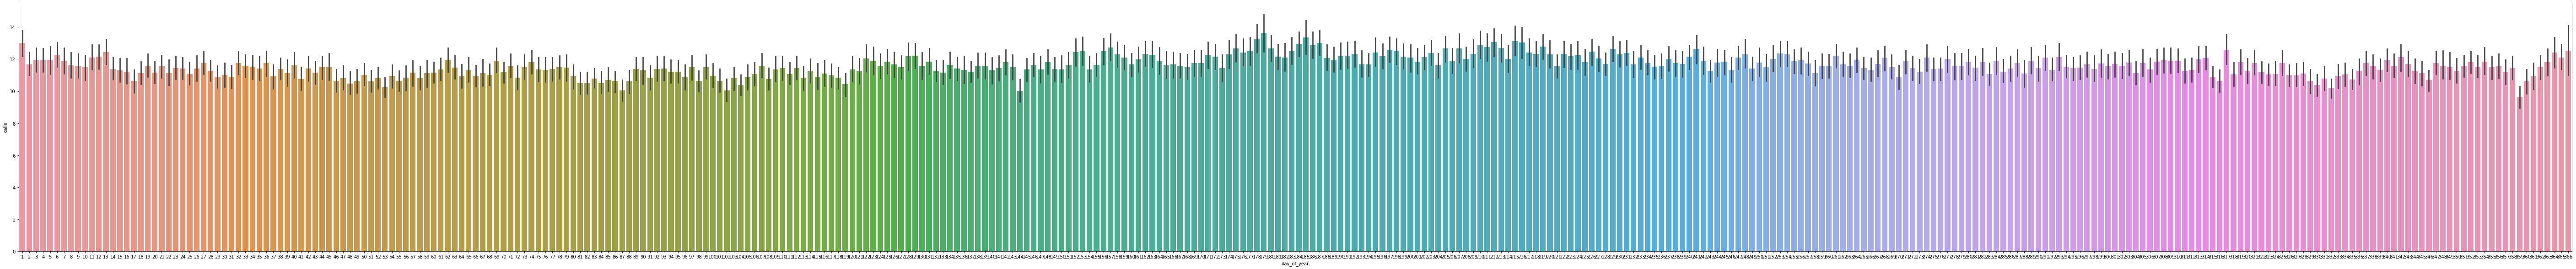

In [24]:
plt.rcParams["figure.figsize"] = (100, 10)
sns.barplot(data = raw_train_data, x = "day_of_year", y = "calls")
plt.savefig(os.path.join(path_to_save, ".".join(["day_yearly_distribution", "png"])))
print(f"Day yearly call distribution plot saved in {path_to_save}")